In [2]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data =load_iris(return_X_y=False)


In [4]:
X = data.data
y = data.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 



In [ ]:

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()


In [ ]:
#Búsqueda por rejilla
from sklearn.model_selection import GridSearchCV

rejilla = {'criterion':['gini','entropy','log_loss'], 'max_depth':[3,5,7], 'min_samples_split':[2,4,8,16]}

modeloGridSearchCrossValidation = GridSearchCV(estimator=modelo,param_grid=rejilla,scoring='accuracy',cv=5)

modeloGridSearchCrossValidation.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='accuracy')

In [9]:
#Best score:
modeloGridSearchCrossValidation.best_score_

np.float64(0.9333333333333332)

In [10]:
mejorModelo = modeloGridSearchCrossValidation.best_estimator_
mejorModelo.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [11]:
y_pred = mejorModelo.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

1.0

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

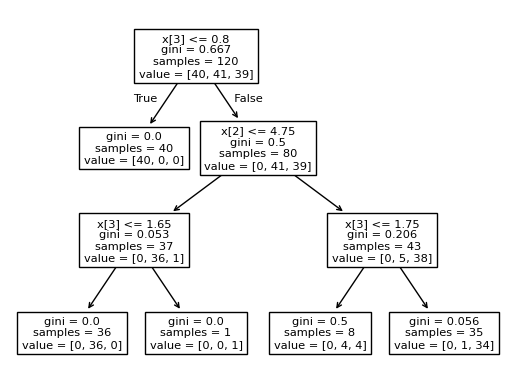

In [14]:
from sklearn import tree
tree.plot_tree(mejorModelo)